In [23]:
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt

#Folder path containing the images
folder_path="image"
#list  all jpg files in the folder
image_files=glob.glob(os.path.join(folder_path, '*.jpg'))
#list to store the images
images=[]
#loop through each image file
for image_path in image_files:
    #read the image using opencv
    img=cv.imread(image_path)
    #cheack if the image was read successfully
    if img is not None:
        images.append(img)
        
    else:
        print(f"Error reading image:{image_path}")
        
#print the number of images
print(f"read {len(images)} images from the folder")


read 4 images from the folder


In [24]:
def resize_images(images,output_folder,new_size=(300,300)):
    resized_images=[]
    for img,image_path in zip(images,image_files):
        resized_img=cv.resize(img,new_size)
        resized_images.append(resized_img)
        filename=os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder,"resized_"+filename),resized_img)
        return resized_images
    

In [25]:
def apply_color_transform(images,output_folder):
    transformed_images=[]
    for img,image_path in zip(images,image_files):
        transformed_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        transformed_images.append(transformed_img)
        filename=os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder,"transformed_"+filename),transformed_img)
        return transformed_images

In [26]:
def normalize_images(images,output_folder):
    normal_images=[]
    for img,img_path in zip(images,image_files):
        normalized_img=img.astype('float32')/255.0
        normal_images.append(normalized_img)
        filename=os.path.basename(image_path)
        cv.imwrite(os.path.join(output_folder,"normalized_"+filename),(normalized_img*255).astype('uint8'))
        return normal_images
        

In [27]:
output_folder=r"C:\Users\ASUS\Desktop\Image processing\sharif"



In [28]:
resized_images=resize_images(images,output_folder)
transformed_images=apply_color_transform(images,output_folder)
normal_images=normalize_images(images,output_folder)
print("Image preprocessing completed")


Image preprocessing completed


Text(0.5, 1.0, 'Normalized image')

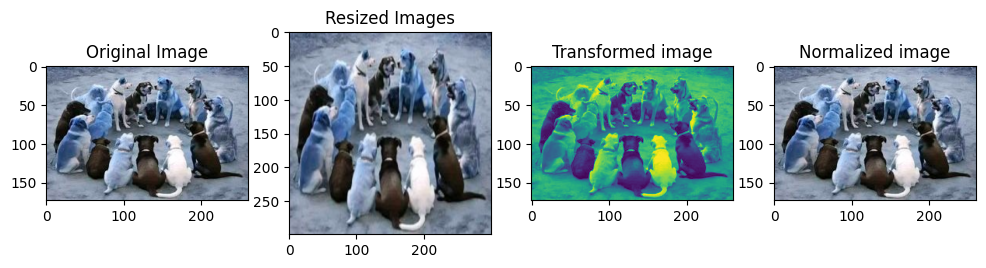

In [29]:
plt.figure(figsize=[12,4])
plt.subplot(141)
plt.imshow(images[0])
plt.title('Original Image')

plt.subplot(142)
plt.imshow(resized_images[0])
plt.title('Resized Images')

plt.subplot(143)
plt.imshow(transformed_images[0])
plt.title("Transformed image")

plt.subplot(144)
plt.imshow(normal_images[0])
plt.title("Normalized image")


In [41]:
import numpy as np
def apply_filters(images, output_folder):
    lowpass_images = []
    highpass_images = []
    gaussian_images = []
    laplacian_images = []
    median_images = []
    box_images = []
    for image, image_path in zip(images, image_files):
        filename = os.path.basename(image_path)
        # Low pass filter
        lowpass = cv.GaussianBlur(image, (3, 3), 0)
        lowpass_images.append(lowpass)
        # High pass filter
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        highpass = cv.filter2D(image, -1, kernel)
        highpass_images.append(highpass)

        # Gaussian filter
        gaussian = cv.GaussianBlur(image, (3, 3), 0)
        gaussian_images.append(gaussian)

        # Laplacian filter
        laplacian = cv.Laplacian(image, cv.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        laplacian_images.append(laplacian)

        # Median filter
        median = cv.medianBlur(image, 3)
        median_images.append(median)

        # Box filter
        box = cv.boxFilter(image, -1, (3, 3))
        box_images.append(box)

        # Save filtered images
        cv.imwrite(os.path.join(output_folder, "lowpass_" + filename), lowpass)
        cv.imwrite(os.path.join(output_folder, "highpass_" + filename), highpass)
        cv.imwrite(os.path.join(output_folder, "gaussian_" + filename), gaussian)
        cv.imwrite(os.path.join(output_folder, "laplacian_" + filename), laplacian)
        cv.imwrite(os.path.join(output_folder, "median_" + filename), median)
        cv.imwrite(os.path.join(output_folder, "box_" + filename), box)
    return lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images

# Create directories to save filtered images
output_folder = r"C:\Users\ASUS\Desktop\Image processing\filter"

lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images, box_images = apply_filters(images, output_folder)


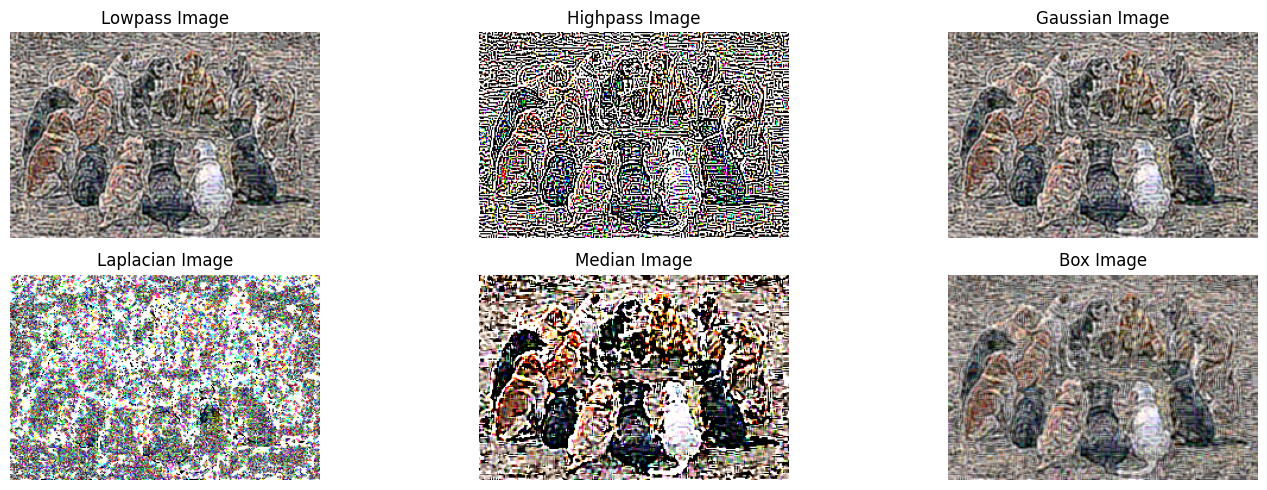

In [42]:
def plot_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images = [lowpass_images[1], highpass_images[1], gaussian_images[1], laplacian_images[1], median_images[1], box_images[1]]
titles = ['Lowpass Image', 'Highpass Image', 'Gaussian Image', 'Laplacian Image', 'Median Image', 'Box Image']
plot_images(images, titles)
